In [1]:
import pandas as pd
import numpy as np

In [2]:
mylist1 = np.arange(0,15,1).reshape(5,3)
mycol = ["a","b","c"]

In [3]:
df = pd.DataFrame(mylist1, columns=mycol)
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [4]:
df_withlabelindex = pd.DataFrame(mylist1, index=["one","two","three", "four","five"], \
                                 columns=mycol)

In [5]:
df_withlabelindex

,a,b,c
one,0,1,2
two,3,4,5
three,6,7,8
four,9,10,11
five,12,13,14


### How to drop rows using index(in df) and labelled index(in df_withlabelindex)

In [6]:
df_withlabelindex.drop(["one","four"], axis=0)

,a,b,c
two,3,4,5
three,6,7,8
five,12,13,14


In [7]:
df.drop(df.index[0:3], axis=0)

,a,b,c
3,9,10,11
4,12,13,14


In [8]:
### Adding a new row in dataframe 

In [9]:
df.head(2)

,a,b,c
0,0,1,2
1,3,4,5


In [10]:
df.append( [16,17,18], ignore_index=False)

,a,b,c,0
0,0.0,1.0,2.0,NaN
1,3.0,4.0,5.0,NaN
2,6.0,7.0,8.0,NaN
3,9.0,10.0,11.0,NaN
4,12.0,13.0,14.0,NaN
0,NaN,NaN,NaN,16.0
1,NaN,NaN,NaN,17.0
2,NaN,NaN,NaN,18.0


In [11]:
mylist1 = np.arange(0,30,1).reshape(10,3)
mycol = ["a","b","c"]

In [12]:
df = pd.DataFrame(mylist1, columns=mycol)
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14
5,15,16,17
6,18,19,20
7,21,22,23
8,24,25,26
9,27,28,29


### Say you have to filter rows where c = 8, 17, 26
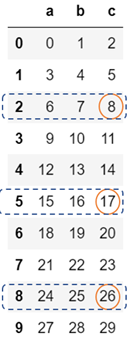

In [13]:
df[(df['c'] == 8) | (df['c'] == 17) | (df['c'] == 26)]

,a,b,c
2,6,7,8
5,15,16,17
8,24,25,26


### However there is an easier way to acheive it using 'isin()'

In [14]:
df[df['c'].isin([8,17,26])]

,a,b,c
2,6,7,8
5,15,16,17
8,24,25,26


### Using apply function on multiple columns
- Lets see an example for one column

In [15]:
mylist1 = np.arange(0,15,1).reshape(5,3)
mycol = ["a","b","c"]
df = pd.DataFrame(mylist1, columns=mycol)
df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [16]:
def odd_num(num):
    if num % 2 == 0:
        return "even"
    else:
        return "odd"

In [17]:
df['odd_even'] = df['c'].apply(odd_num)
df

,a,b,c,odd_even
0,0,1,2,even
1,3,4,5,odd
2,6,7,8,even
3,9,10,11,odd
4,12,13,14,even


#### In above example 'apply' was applied to only one colum, lets take another example to apply on multiple columns

In [18]:
df['odd_even_withlambda'] = df['c'].apply(lambda x : 'even' if x%2==0 else 'odd')

In [19]:
df

,a,b,c,odd_even,odd_even_withlambda
0,0,1,2,even,even
1,3,4,5,odd,odd
2,6,7,8,even,even
3,9,10,11,odd,odd
4,12,13,14,even,even


### Now lets appy to 2 columms

In [20]:
def two_col(b,c):
    if (b > c):
        return "b >c"
    else:
        return "b < c"

In [21]:
df.columns

Index(['a', 'b', 'c', 'odd_even', 'odd_even_withlambda'], dtype='object')

In [22]:
df[['b','c']].apply(lambda df : two_col(df['b'], df['c']), axis =1)

0    b < c
1    b < c
2    b < c
3    b < c
4    b < c
dtype: object

In [23]:
df["with_lamdba"] = df[['b','c']].apply(lambda df : two_col(df['b'], df['c']), axis =1)

In [24]:
df.head(2)

,a,b,c,odd_even,odd_even_withlambda,with_lamdba
0,0,1,2,even,even,b < c
1,3,4,5,odd,odd,b < c


### Lets use <span style='color:green'> np.vectorize </span> to do the same thing, much FASTER !

In [25]:
df["with_vectorize"] = np.vectorize(two_col)(df['b'],df['c'])

In [26]:
df.head(2)

,a,b,c,odd_even,odd_even_withlambda,with_lamdba,with_vectorize
0,0,1,2,even,even,b < c,b < c
1,3,4,5,odd,odd,b < c,b < c


### Mapping values from one form to another, using  <span style='color:green'>'map'  </span> function

In [27]:
df = pd.read_csv("tips.csv")

In [28]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608


### For the above table lets map 
- Female -> F and Male -> M
- Smoker Yes -> Y and Smoker No -> N

In [32]:
mymap = {"Female":"F", "Male":"M", "Yes":"Y", "No":"N"}

In [41]:
df["sex_map"] = df["sex"].map(mymap)

In [40]:
df['smoker_map']= df['smoker'].map(mymap)

In [42]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,smoker_map,sex_map
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,N,F
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,N,M


### Finding   duplicates using <span style='color:green'>'duplicated'  </span> 
- drop duplicates using drop_duplicates()

In [44]:
df['sex'].duplicated().value_counts()

True     242
False      2
Name: sex, dtype: int64

### <span style='color:green'>'between' </span>  method - Superb ! 
- Say you want to find the total_bills between \$10 \ and  \ $20 (inclusive)
- Example below describes 2 ways, simpler and smarter(using between)

In [52]:
# Simpler way 
(df['total_bill'] >= 10) & (df['total_bill'] <= 20 )

0       True
1       True
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242     True
243     True
Name: total_bill, Length: 244, dtype: bool

In [54]:
## Smarter way
df['total_bill'].between(10,20, inclusive=True)

0       True
1       True
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242     True
243     True
Name: total_bill, Length: 244, dtype: bool

### <span style='color:green'>'nlargest' & 'nsmallest' </span>  method - Superb ! 

In [57]:
## Display 10 largest rows based on tip column. It is basically sort values and head()
df.nlargest(10,'tip')

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,smoker_map,sex_map
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954,Y,M
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590,N,M
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239,N,M
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139,N,M
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025,N,M
183,23.17,6.50,Male,Yes,Sun,Dinner,4,5.79,Dr. Michael James,4718501859162,Sun6059,Y,M
214,28.17,6.50,Female,Yes,Sat,Dinner,3,9.39,Marissa Jackson,4922302538691962,Sat3374,Y,F
47,32.40,6.00,Male,No,Sun,Dinner,4,8.10,James Barnes,3552002592874186,Sun9677,N,M
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657,N,M
88,24.71,5.85,Male,No,Thur,Lunch,2,12.36,Roger Taylor,4410248629955,Thur9003,N,M


In [58]:
df.nsmallest(2,'tip')

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,smoker_map,sex_map
67,3.07,1.0,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,Y,F
92,5.75,1.0,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780,Y,F


### <span style='color:green'>'sample' </span> from the data set
- based on number of rows or %age of data

In [62]:
# Return 10 arbitary # of rown from dataframe 
df.sample(n=10)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,smoker_map,sex_map
234,15.53,3.00,Male,Yes,Sat,Dinner,2,7.76,Tracy Douglas,4097938155941930,Sat7220,Y,M
75,10.51,1.25,Male,No,Sat,Dinner,2,5.26,Kenneth Hayes,213142079731108,Sat5056,N,M
123,15.95,2.00,Male,No,Thur,Lunch,2,7.98,Christopher Lang,4820629318698319,Thur1992,N,M
126,8.52,1.48,Male,No,Thur,Lunch,2,4.26,Mario Bradshaw,4524404353861811,Thur6719,N,M
171,15.81,3.16,Male,Yes,Sat,Dinner,2,7.90,David Hall,502004138207,Sat6750,Y,M
13,18.43,3.00,Male,No,Sun,Dinner,4,4.61,Joshua Jones,6011163105616890,Sun2971,N,M
129,22.82,2.18,Male,No,Thur,Lunch,3,7.61,Raymond Torres,4855776744024,Thur9424,N,M
243,18.78,3.00,Female,No,Thur,Dinner,2,9.39,Michelle Hardin,3511451626698139,Thur672,N,F
227,20.45,3.00,Male,No,Sat,Dinner,4,5.11,Robert Bradley,213141668145910,Sat4319,N,M
164,17.51,3.00,Female,Yes,Sun,Dinner,2,8.76,Audrey Griffin,3500853929693258,Sun444,Y,F


In [65]:
## Returns fractional # of rows from data set
df.sample(frac=.01)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,smoker_map,sex_map
6,8.77,2.0,Male,No,Sun,Dinner,2,4.38,Kristopher Johnson,2223727524230344,Sun5985,N,M
225,16.27,2.5,Female,Yes,Fri,Lunch,2,8.14,Whitney Arnold,3579111947217428,Fri6665,Y,F
